<a href="https://colab.research.google.com/github/patcon/valency-anndata/blob/main/example-usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet \
  git+https://github.com/patcon/polis-client \
  git+https://github.com/polis-community/red-dwarf@algo-registries \
  git+https://github.com/patcon/valency-anndata

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.6 MB/s eta 0:00:00

In [1]:
# Customize Jupyter notebook environment settings.
import pandas as pd
pd.options.display.max_rows = 6

In [2]:
import valency_anndata as val

# Sets default matplotlib render settings.
val.scanpy.settings.set_figure_params(dpi=50, facecolor="white")

# For setting per-figure render settings.
from matplotlib.pyplot import rc_context as plot_render_context

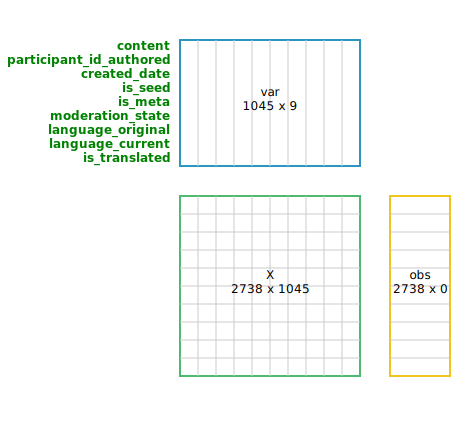

AnnData object with n_obs × n_vars = 2738 × 1045
    var: 'content', 'participant_id_authored', 'created_date', 'is_seed', 'is_meta', 'moderation_state', 'language_original', 'language_current', 'is_translated'
    uns: 'votes', 'votes_meta', 'statements', 'statements_meta', 'source', 'schema'

In [17]:
adata = val.datasets.polis.load("https://pol.is/report/r29kkytnipymd3exbynkd")
# These workl similarly to the above source:
#   - r29kkytnipymd3exbynkd
#   - https://pol.is/3hfmicmybc
#   - 3hfmicmybc
#
# NOTE: Technically, there are some differences between
# 1. data fetched from CSV exports (best source when we have report_id) and
# 2. data fetched from API endpoints (best we can do when we only have conversation_id)

# Show schematic diff from a fresh state.
val.viz.schematic_diagram(adata, diff_from=None)

adata

In [4]:
# Note the Spanish statements.
adata.var

,content,participant_id_authored,created_date,is_seed,is_meta,moderation_state,language_original,language_current,is_translated
comment-id,,,,,,,,,
0,"No se trata de guillotinar a los ricos, quemar...",0,1572705212934,True,False,-1,es,es,False
1,"Prioridades del Gobierno,recogiendo demandas c...",1,1572705358753,True,True,-1,es,es,False
2,Este #CambiodeGabinete significa el inicio de ...,1,1572705410503,True,True,-1,es,es,False
...,...,...,...,...,...,...,...,...,...
1042,"Piñera no debe renunciar, debe actuar dando so...",2723,1574511928682,False,False,0,es,es,False
1043,"Desde el ""regreso de la democracia"" la politic...",2731,1574528527078,False,False,0,es,es,False
1044,Este movimiento social hará replantear el cómo...,2741,1577201390675,False,False,0,es,es,False


## Translate statements

In [5]:
# Translate all statements into a common language. Let's try English.
# We could have added this during initial loading:
#
#     adata = val.datasets.polis.load("<report url>", translate_to="en")
#
# Done using unofficial [Google Translate] APIs, so no auth required!
# See: https://github.com/ssut/py-googletrans
val.datasets.polis.translate_statements(adata, translate_to="en")

adata.var

,content,participant_id_authored,created_date,is_seed,is_meta,moderation_state,language_original,language_current,is_translated
comment-id,,,,,,,,,
0,"It is not about guillotining the rich, burning...",0,1572705212934,True,False,-1,es,en,True
1,"Government priorities, collecting citizen dema...",1,1572705358753,True,True,-1,es,en,True
2,This #CabinetChange means the beginning of a n...,1,1572705410503,True,True,-1,es,en,True
...,...,...,...,...,...,...,...,...,...
1042,"Piñera should not resign, he should act by giv...",2723,1574511928682,False,False,0,es,en,True
1043,"Since the ""return of democracy"" Chilean politi...",2731,1574528527078,False,False,0,es,en,True
1044,This social movement will rethink how public i...,2741,1577201390675,False,False,0,es,en,True


## Polis Recipe

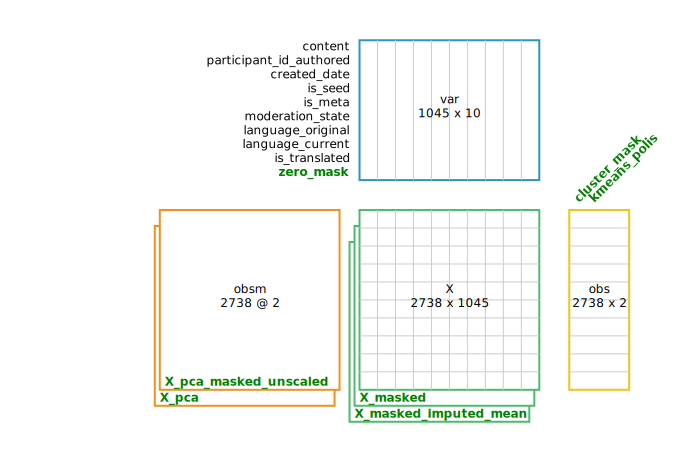

AnnData object with n_obs × n_vars = 2738 × 1045
    obs: 'cluster_mask', 'kmeans_polis'
    var: 'content', 'participant_id_authored', 'created_date', 'is_seed', 'is_meta', 'moderation_state', 'language_original', 'language_current', 'is_translated', 'zero_mask'
    uns: 'votes', 'votes_meta', 'statements', 'statements_meta', 'source', 'schema', 'X_pca_masked_unscaled', 'kmeans_polis'
    obsm: 'X_pca_masked_unscaled', 'X_pca'
    varm: 'X_pca_masked_unscaled'
    layers: 'X_masked', 'X_masked_imputed_mean'

In [18]:
polis_adata = adata.copy()

with val.viz.schematic_diagram(diff_from=polis_adata):
  # Normally recipe_polis writes PCA projects to X_pca_polis, but
  # we'll override key to X_pca for simplicity of plotting.
  # (If we don't override, we must use val.scanpy.pl.embedding to plot.)
  val.tools.recipe_polis(
      polis_adata,
      key_added_pca="X_pca",
      key_added_kmeans="kmeans_polis",
  )

polis_adata

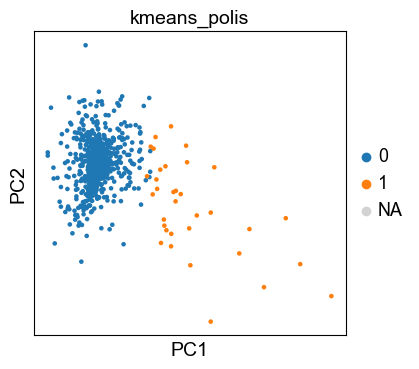

kmeans_polis
0      1709
NaN     995
1        34
Name: count, dtype: int64

In [19]:
val.viz.pca(polis_adata, color="kmeans_polis")

polis_adata.obs["kmeans_polis"].value_counts(dropna=False)

## Polis recipe: PaCMAP variant

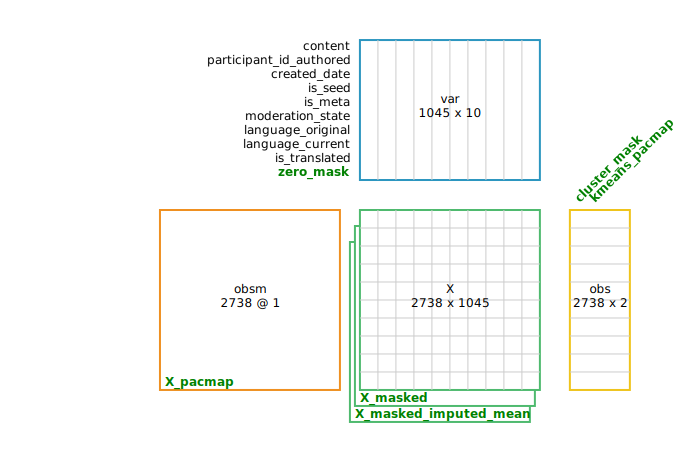

AnnData object with n_obs × n_vars = 2738 × 1045
    obs: 'cluster_mask', 'kmeans_pacmap'
    var: 'content', 'participant_id_authored', 'created_date', 'is_seed', 'is_meta', 'moderation_state', 'language_original', 'language_current', 'is_translated', 'zero_mask'
    uns: 'votes', 'votes_meta', 'statements', 'statements_meta', 'source', 'schema', 'kmeans_pacmap'
    obsm: 'X_pacmap'
    layers: 'X_masked', 'X_masked_imputed_mean'

In [9]:
from valency_anndata.tools._polis import _zero_mask, _cluster_mask

pacmap_adata = adata.copy()

with val.viz.schematic_diagram(diff_from=pacmap_adata):
  # Set to X_pca for simplicity of plotting in next step.
  _zero_mask(pacmap_adata)
  val.preprocessing.impute(
    pacmap_adata,
    strategy="mean",
    source_layer="X_masked",
    target_layer="X_masked_imputed_mean",
  )
  val.tools.pacmap(
    pacmap_adata,
    layer="X_masked_imputed_mean",
  )
  _cluster_mask(pacmap_adata)
  val.tools.kmeans(
    pacmap_adata,
    init="polis", # BUG: fix this to accept kmeans++
    k_bounds=(2, 9),
    use_rep="X_pacmap",
    mask_obs="cluster_mask",
    key_added="kmeans_pacmap",
  )

pacmap_adata

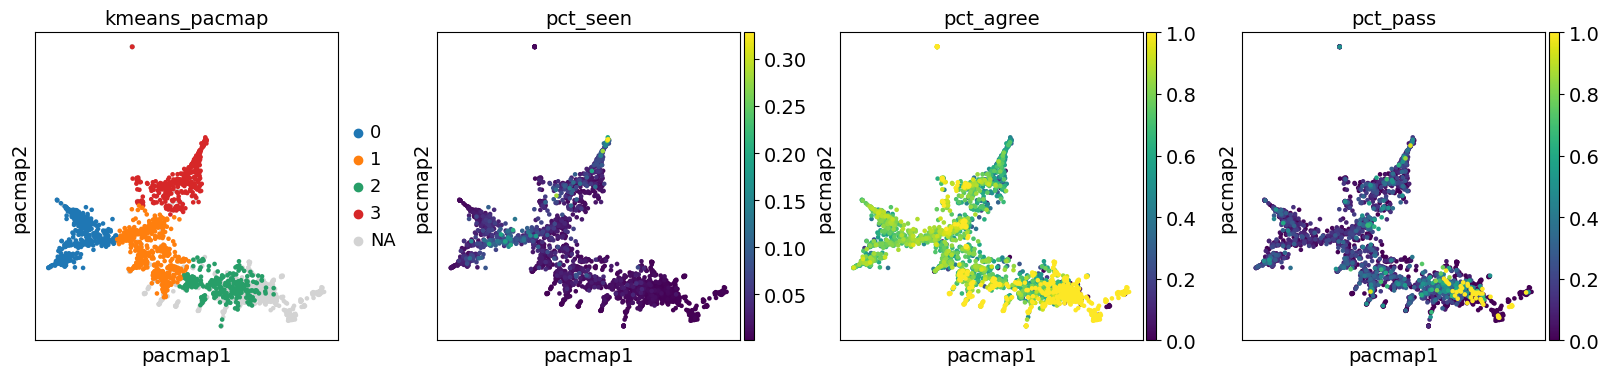

In [ ]:
val.preprocessing.calculate_qc_metrics(pacmap_adata, inplace=True)
val.viz.embedding(
  pacmap_adata,
  basis="pacmap",
  color=["kmeans_pacmap", "pct_seen", "pct_agree", "pct_pass"],
)

## Quality Control Metrics

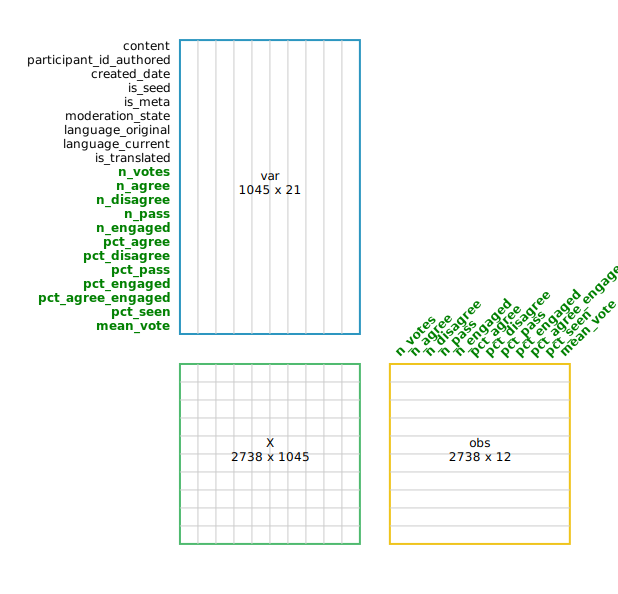

In [13]:
with val.viz.schematic_diagram(diff_from=adata):
  val.preprocessing.calculate_qc_metrics(adata, inplace=True)

## PCA

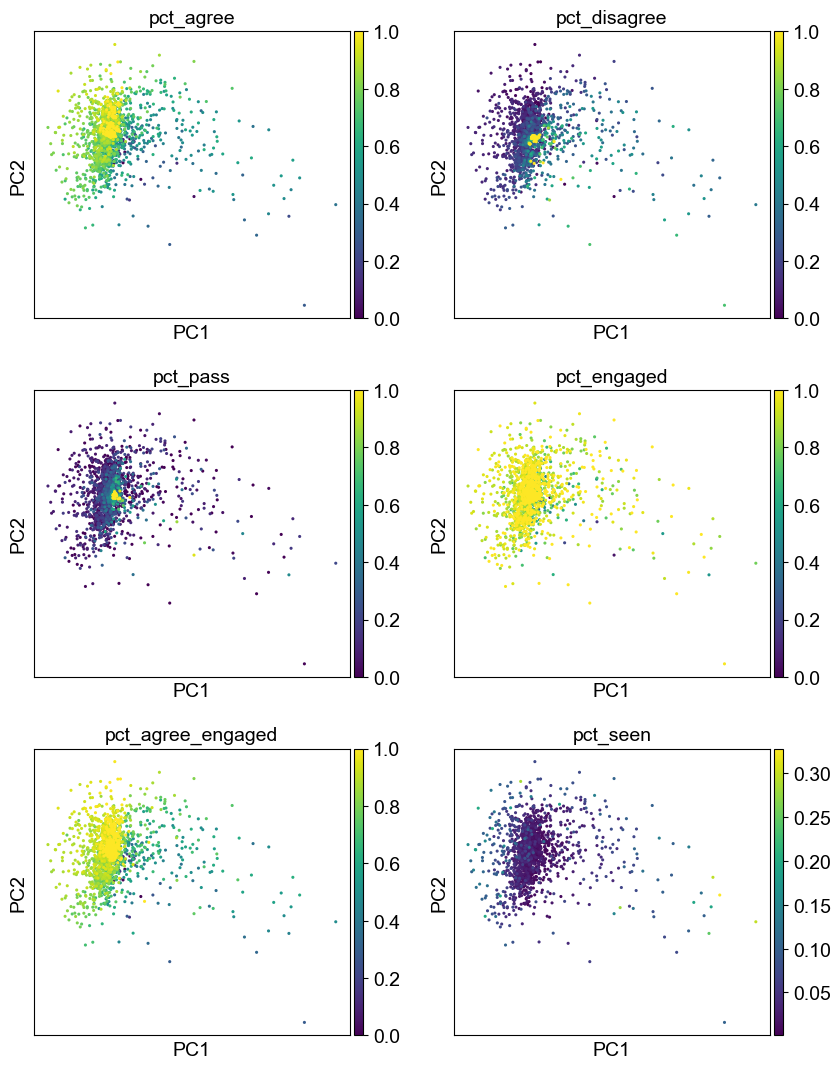

In [14]:
# Prepare a rough Polis pipeline (not fully prepared)
val.preprocessing.impute(adata, strategy="mean")
val.tools.pca(adata, layer="X_imputed_mean")

# See how various participant QC metrics look.
# Participant rows are "observations", so use "obs" entries listed above.
val.viz.pca(
    adata,
    color=['pct_agree', 'pct_disagree', 'pct_pass', 'pct_engaged', 'pct_agree_engaged', 'pct_seen'],
    ncols=2,
    size=20,
)

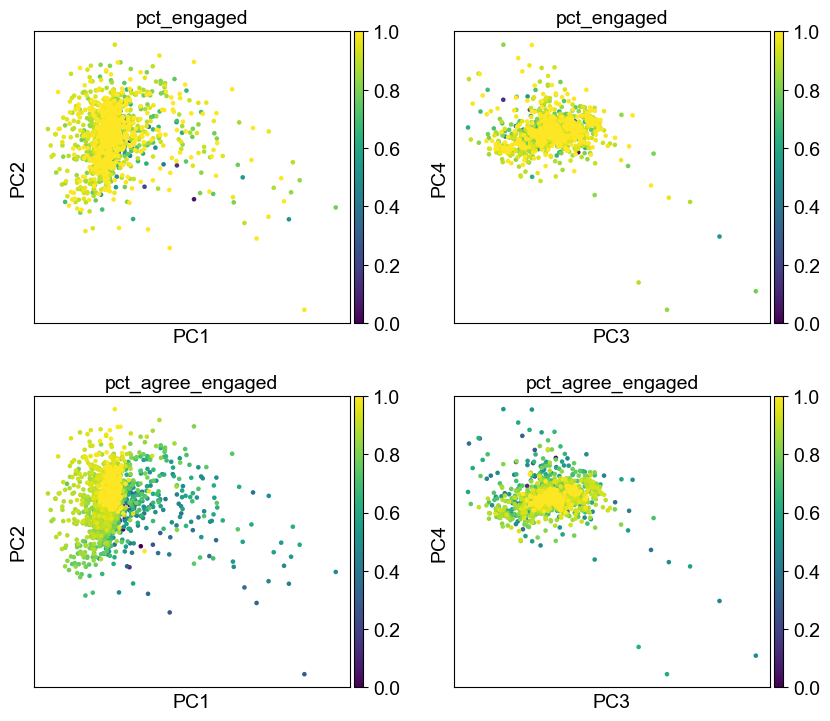

In [15]:
# Check out how different different principle components look.
val.viz.pca(
    adata,
    color=['pct_engaged', 'pct_engaged', 'pct_agree_engaged', 'pct_agree_engaged'],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
)

## Leiden Clustering

In [22]:
val.preprocessing.neighbors(adata)

/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


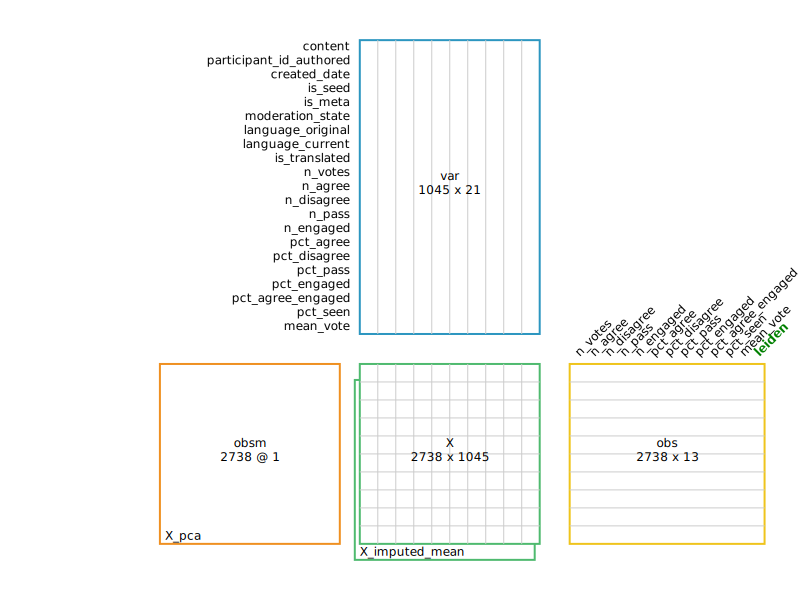

In [23]:
with val.viz.schematic_diagram(diff_from=adata):
  val.tools.leiden(adata, flavor="igraph")

## UMAP

In [24]:
val.tools.umap(adata)

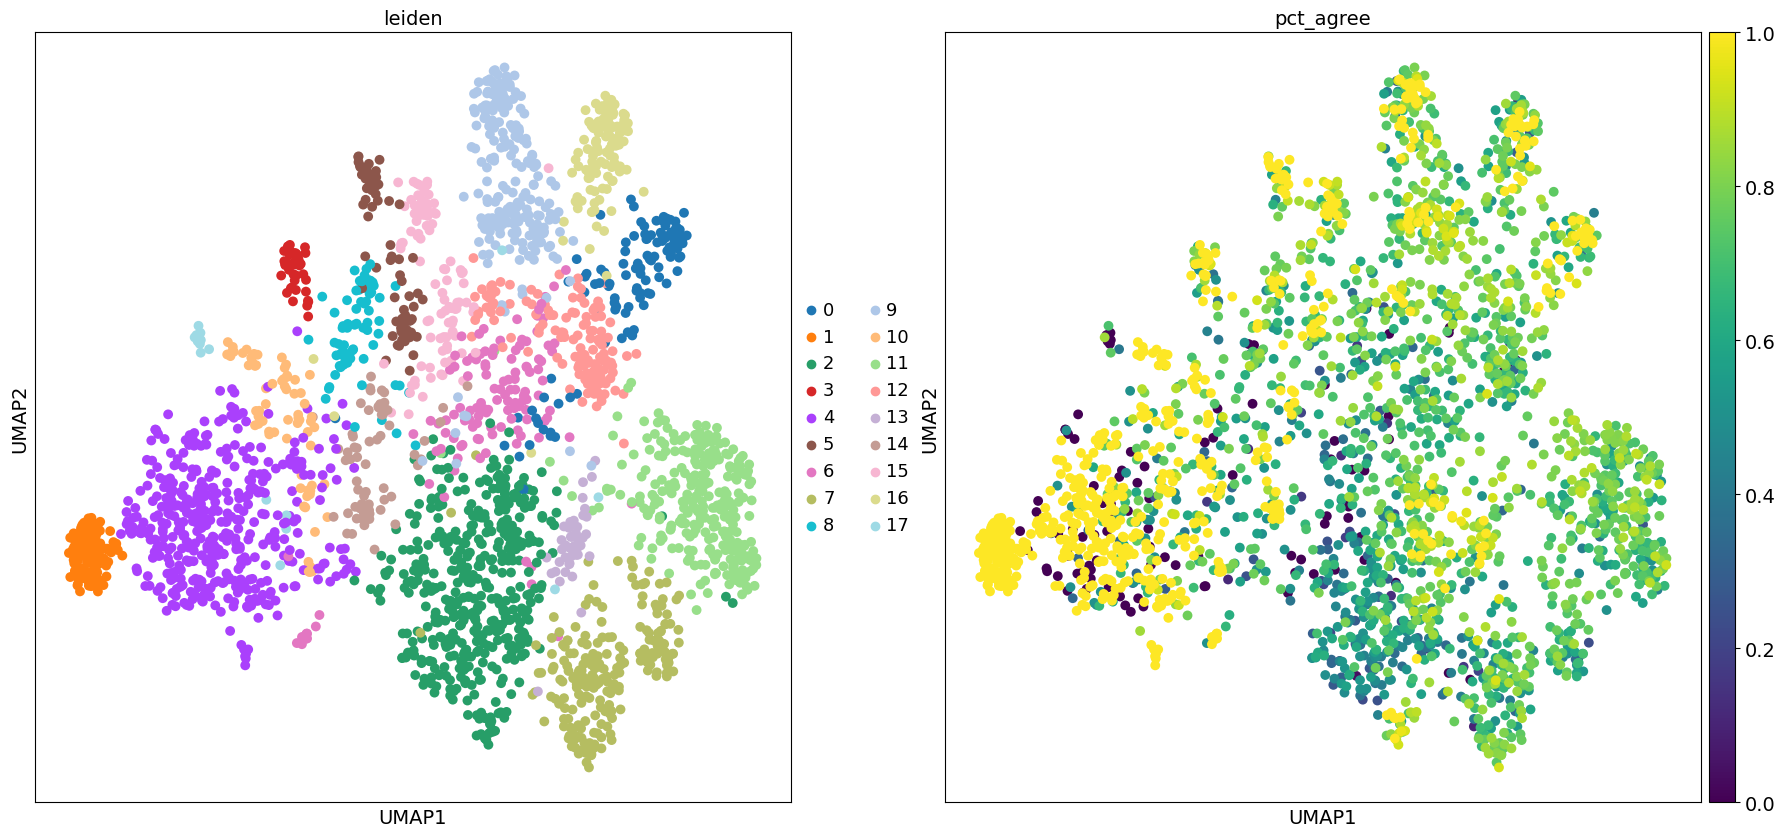

In [43]:
with plot_render_context({"figure.figsize": (10, 10), "figure.dpi": 50}):
  val.viz.umap(adata, color=["leiden", "pct_agree"], size=200)

## Langevitour

In [26]:
adata

AnnData object with n_obs × n_vars = 2738 × 1045
    obs: 'n_votes', 'n_agree', 'n_disagree', 'n_pass', 'n_engaged', 'pct_agree', 'pct_disagree', 'pct_pass', 'pct_engaged', 'pct_agree_engaged', 'pct_seen', 'mean_vote', 'leiden'
    var: 'content', 'participant_id_authored', 'created_date', 'is_seed', 'is_meta', 'moderation_state', 'language_original', 'language_current', 'is_translated', 'n_votes', 'n_agree', 'n_disagree', 'n_pass', 'n_engaged', 'pct_agree', 'pct_disagree', 'pct_pass', 'pct_engaged', 'pct_agree_engaged', 'pct_seen', 'mean_vote'
    uns: 'votes', 'votes_meta', 'statements', 'statements_meta', 'source', 'schema', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_imputed_mean'
    obsp: 'distances', 'connectivities'

In [27]:
val.viz.langevitour(
    adata,
    use_reps=["X_umap", "X_pca[:10]"],
    color="leiden",
    initial_axes=["X_umap[0]", "X_umap[1]"],
)

# Dreamcode

In [28]:
from IPython.display import Image, display

# When we are executing prospective functionality that hasn't yet been written,
# we wrap it in a conditional and in the meantime output a placeholder/mockup.
#
# Thanks to Gregor Martynus (gr2m) for concept: https://github.com/gr2m/dreamcode.io
def dreamcode_exists(placeholder_image=None):
  if placeholder_image:
    display(Image(url=placeholder_image, width=500))

  # Dreamcode never exists yet.
  return False

## Loading Datasets

In [29]:
if dreamcode_exists():
  # See: https://github.com/patcon/universal-polis-wrapper/
  adata = val.datasets.polis.load(source="https://pol.is/2demo")
  # This would augment Polis conversation data by importing
  # participant data from a typeform into anndata's adata.obs DataFrame
  # by opportunistically joining the data via any matched xids
  val.datasets.import_typeform(adata, typeform_id="wFXxYRdJ")

In [30]:
# Inspiration: https://scanpy.readthedocs.io/en/stable/api/datasets.html

if dreamcode_exists():
  # This would be a variant where likert scale data is loaded.
  #     - this would use `val.preprocessing.convert_likert` (see below)
  #     - this could either augment polis conversation data, or be used in lieu
  #       of Polis data, processing all data from Typeform responses.
  #
  # See: https://github.com/polis-community/red-dwarf/issues/89
  val.datasets.import_typeform(adata, typeform_id="wFXxYRdJ", likert_conversion=True)
  val.datasets.import_typeform(adata, typeform_id="wFXxYRdJ", likert_conversion="liberal")
  val.datasets.import_typeform(adata, typeform_id="wFXxYRdJ", likert_conversion="conversative")

  # Extract polislike valence data from CIP Global Dialogues on AI.
  #     - citizens of many countries surveyed over time.
  #     - pre-generated synthetic agree/disagree/pass data.
  #
  # See: https://globaldialogues.ai/about
  # See: https://globaldialogues.ai/download-data
  adata = val.datasets.load_cip_global_dialogues()

  # Extract polislike valence data from UTokyo Asahi Survey (UTAS).
  #     - pre-election survey of both voters and electoral candidates.
  #     - long history, running most years since 2003.
  #     - media collaboration gives rare high rate of politician responses.
  #     - repeats a substantial number of questions across survey waves.
  #
  # See: https://www.masaki.j.u-tokyo.ac.jp/utas/utasindex_en.html
  # See: https://github.com/nishio/UTAS-UMAP
  adata = val.datasets.load_utokyo_asahi_survey()

  # Extract polislike valence data from Convert World Values Survey (WVS).
  #     - well-known repeated survey of Swartz human values.
  #     - can specify data subset in various ways for convenience.
  #
  # See: https://www.worldvaluessurvey.org/WVSContents.jsp
  adata = val.datasets.load_world_values_survey(wave=8)
  adata = val.datasets.load_world_values_survey(years=1997)

  # Extract polislike valence data from European Social Survey (ESS).
  #     - well-known repeated survey of Swartz human values.
  #     - has sections also focussed on current events.
  #     - can specify data subset in various ways for convenience.
  #
  # See: https://ess.sikt.no/en/series/321b06ad-1b98-4b7d-93ad-ca8a24e8788a
  # See: https://github.com/ropensci/essurvey/issues/57#issuecomment-3643483042
  adata = val.datasets.load_european_social_survey(round=11)

## Preprocessing

In [31]:
if dreamcode_exists():
  # Process likert scale data into polislike/valence data. e.g., -1/0/+1
  #     - there are different ways to convert likert scales:
  #       - liberal: 12345 => DDPAA
  #       - strict: 12345 => DPPPA
  #     - there might be clever, per-participant ways to deduce thresholds
  #     - this is used as basis of processing many other datasets
  val.preprocessing.convert_likert(vote_data, conversion_scheme="DDPAA")

In [32]:
if dreamcode_exists():
  # Inspiration: https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.calculate_qc_metrics.html
  pbmc.var["mito"] = pbmc.var_names.str.startswith("MT-")
  sc.pp.calculate_qc_metrics(pbmc, qc_vars=["mito"], inplace=True)
  sns.jointplot(
      data=pbmc.obs,
      x="log1p_total_counts",
      y="log1p_n_genes_by_counts",
      kind="hex",
  )
  sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

## PCA

In [33]:
# Inspiration: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#dimensionality-reduction

if dreamcode_exists("https://imgur.com/N7K3cgf.png"):
  # Inspiration: https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.pca.html
  val.tools.pca(adata)
  # Inspiration: https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.pca_variance_ratio.html
  val.viz.pca_variance_ratio(adata, n_pcs=50, log=True)


## UMAP

In [34]:
if dreamcode_exists("https://imgur.com/t7G45jo.png"):
  # Inspiration: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#nearest-neighbor-graph-construction-and-visualization
  # Inspiration: https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pp.neighbors.html
  val.preprocessing.neighbors(adata)
  # Inspiration: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.umap.html
  val.tools.umap(adata)
  # Inspiration: https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.umap.html
  val.viz.umap(
      adata,
      color="kmeans",
      # Setting a smaller point size to get prevent overlap
      size=2,
  )


## DataMapPlot

In [35]:
if dreamcode_exists("https://imgur.com/IfrR6vp.png"):
  # See:
  # See: https://github.com/TutteInstitute/datamapplot/blob/main/doc/basic_usage.ipynb
  val.viz.datamapplot(
      adata,
      map_of="participants",
      basis="umap",
      color="kmeans",
  )

In [36]:
if dreamcode_exists("https://imgur.com/IfrR6vp.png"):
  # See: https://github.com/TutteInstitute/datamapplot/blob/main/doc/interactive_intro.ipynb
  val.viz.datamapplot(
      adata,
      map_of="statements",
      basis="umap",
      color="kmeans",
      interactive=True,
  )

## Talk to the City

In [37]:
if dreamcode_exists("https://imgur.com/daYtomz.png"):
  # See: https://github.com/AIObjectives/tttc-light-js/blob/dd6e11f9bb62215a9c5c6caeaf799d1c2f97745a/pyserver/config.py
  val.tools.talktothecity.generate_synthetic_reactions(adata)
  # Examples: https://takahiroanno2024.github.io/tokyoai-analysis/
  val.tools.talktothecity.generate_report(adata)

## Perspective Explorer

In [38]:
if dreamcode_exists("https://imgur.com/yVOG22g.png"):
  val.viz.perspective_explorer(
    adata,
    use_reps=[
      "X_mean_pca", "X_mean_pacmap", "X_mean_localmap",
      "X_knn5d_pca", "X_knn5d_pacmap", "X_knn5d_localmap",
    ],
    color_presets_basis=["kmeans", "hdbscan"],
    metrics=["pct_seen", "X_pca[:10]", "hubness"]
  )

## Extract & Render Geographic Data

In [39]:
if dreamcode_exists("https://imgur.com/0dQuYJW.png"):
  # 1. Use an LLM to analyse all the statements of indications of geographic boundaries.
  # 2. Search Open Street Map for boundaries, and then extract via API and process.
  # 3. Choose the best representation of a boundary for each participant.
  # 4. Add centroid as latlon to adata.obsm["geospatial"]
  # See: https://github.com/patcon/kedro-polislike-pipelines/issues/1
  # See: https://main--68c53b7909ee2fb48f1979dd.chromatic.com/iframe.html?id=components-app-kedro-mode--kedro-mode-with-animation&args=kedroBaseUrl%3Ahttps__COLON____SLASH____SLASH__patcon__DOT__github__DOT__io__SLASH__kedro-polislike-pipelines-san-juan-islands__SLASH__&viewMode=story
  val.tools.extract_geo_boundaries(adata)
  val.viz.perspective_explorer(adata, use_reps=["X_mean_pca", "X_mean_localmap", "geospatial"])


## Visualize Annotated Matrices

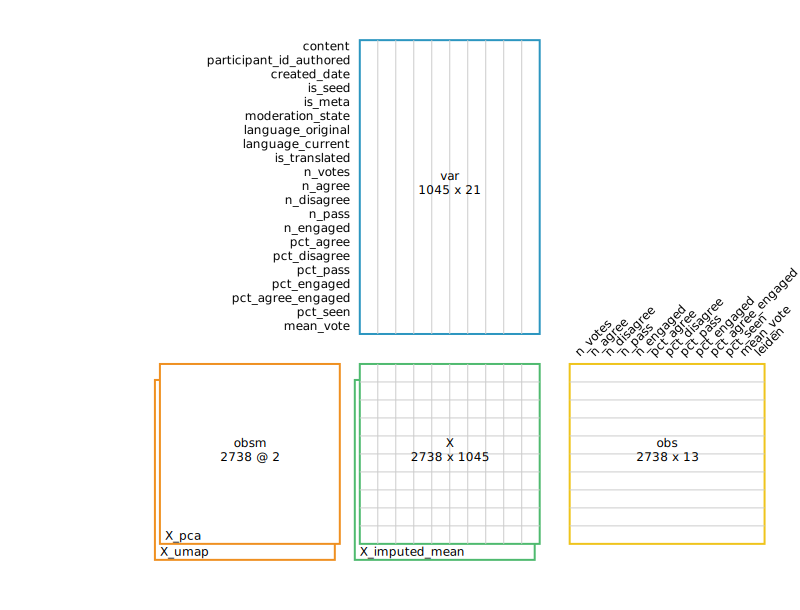

In [40]:
val.viz.schematic_diagram(adata)


In [41]:
if dreamcode_exists("https://imgur.com/Mm7Ejmx.png"):
  # TODO:
  #   - [x] render .obs, .var and .X blocks
  #   - [x] render .obs and .var labels
  #   - [x] render .layers (variants of .X)
  #   - [ ] render .uns (unstructured data)
  #   - [x] render .obsm (other representations of obs)
  #     - e.g., X_pca, X_umap
  #   - [ ] render .varm (other representations of var)
  #   - [x] render visual diffs
  updated_adata = val.viz.some_action(adata, inplace=False)
  val.viz.schematic_diagram(updated_adata, diff_from=adata)